# Сетевое взаимодействие

## Модели передачи данных

Есть 2 основных модели передачи данных - OSI и TCP/IP

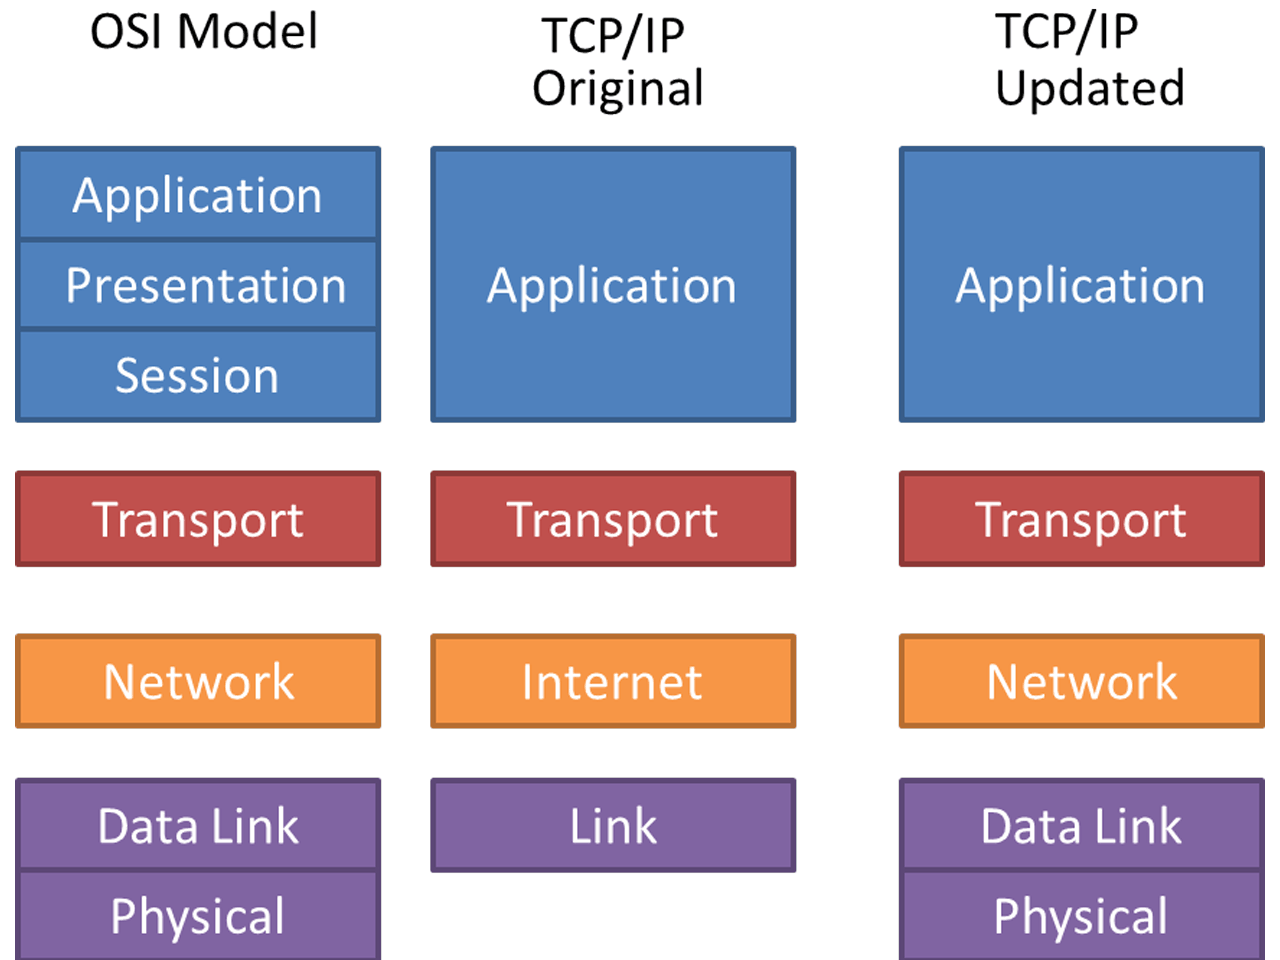

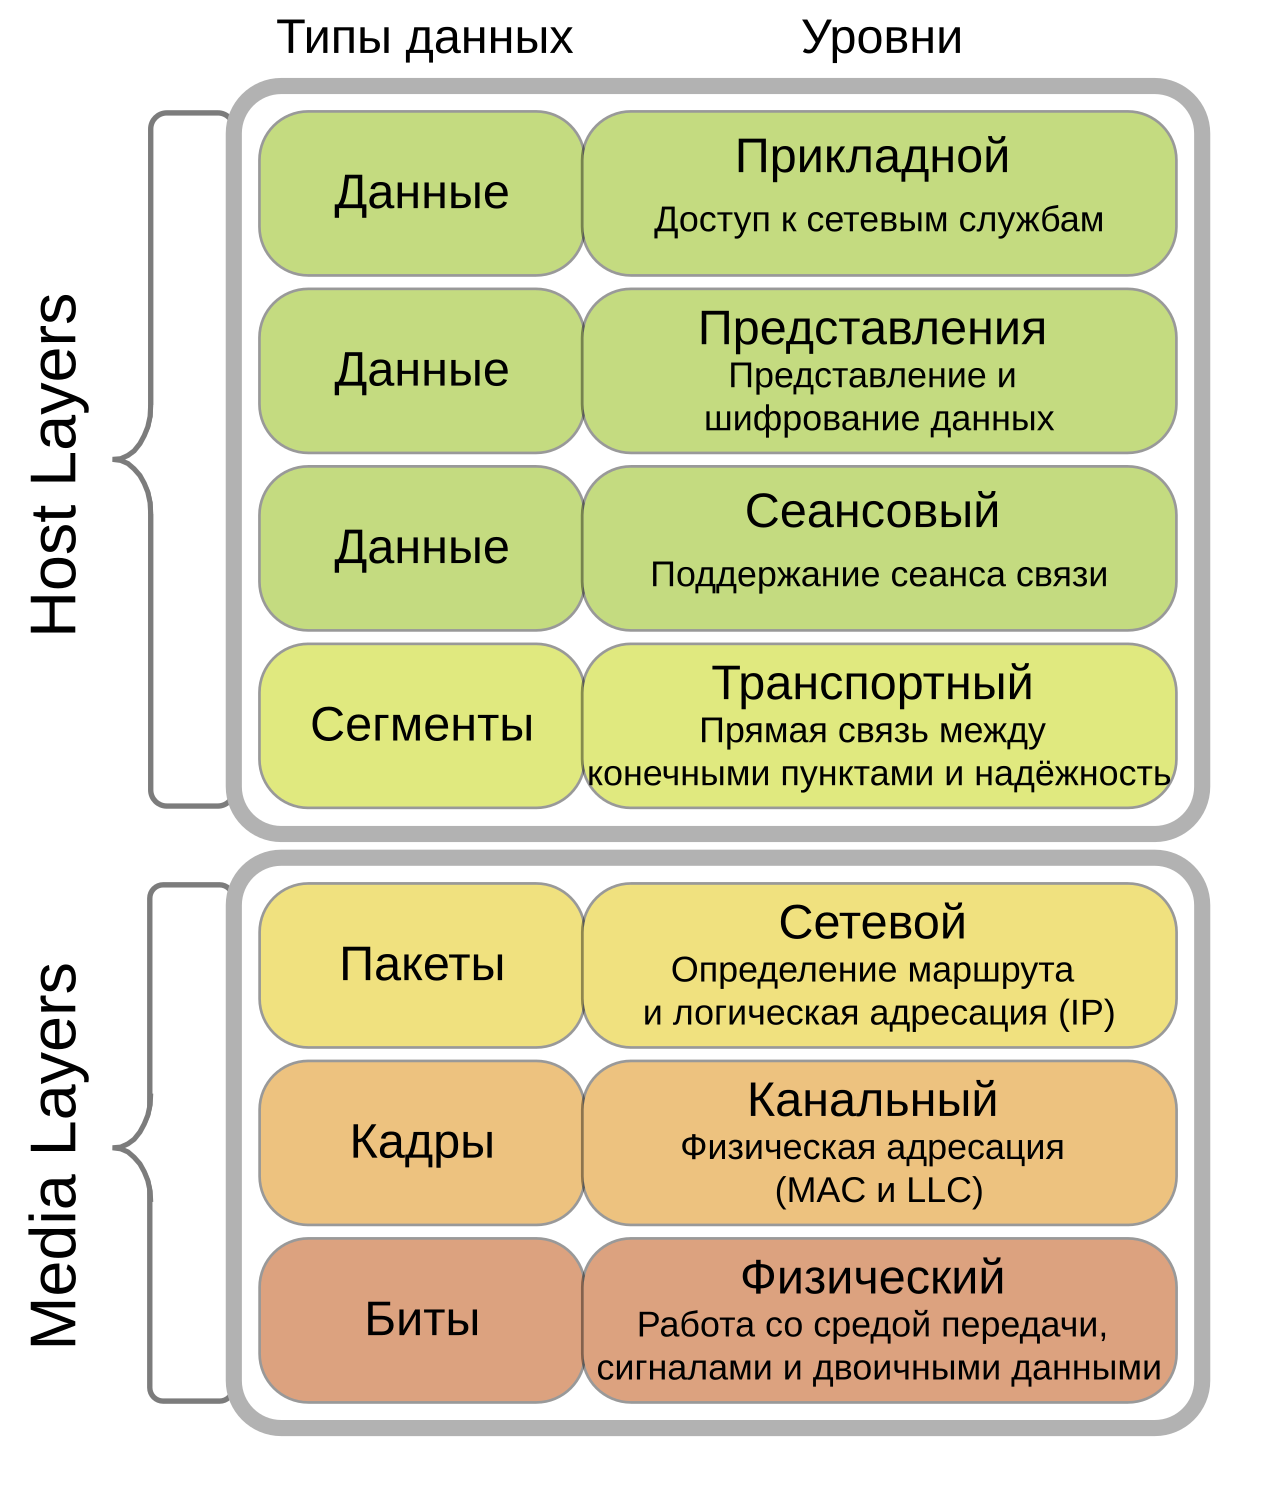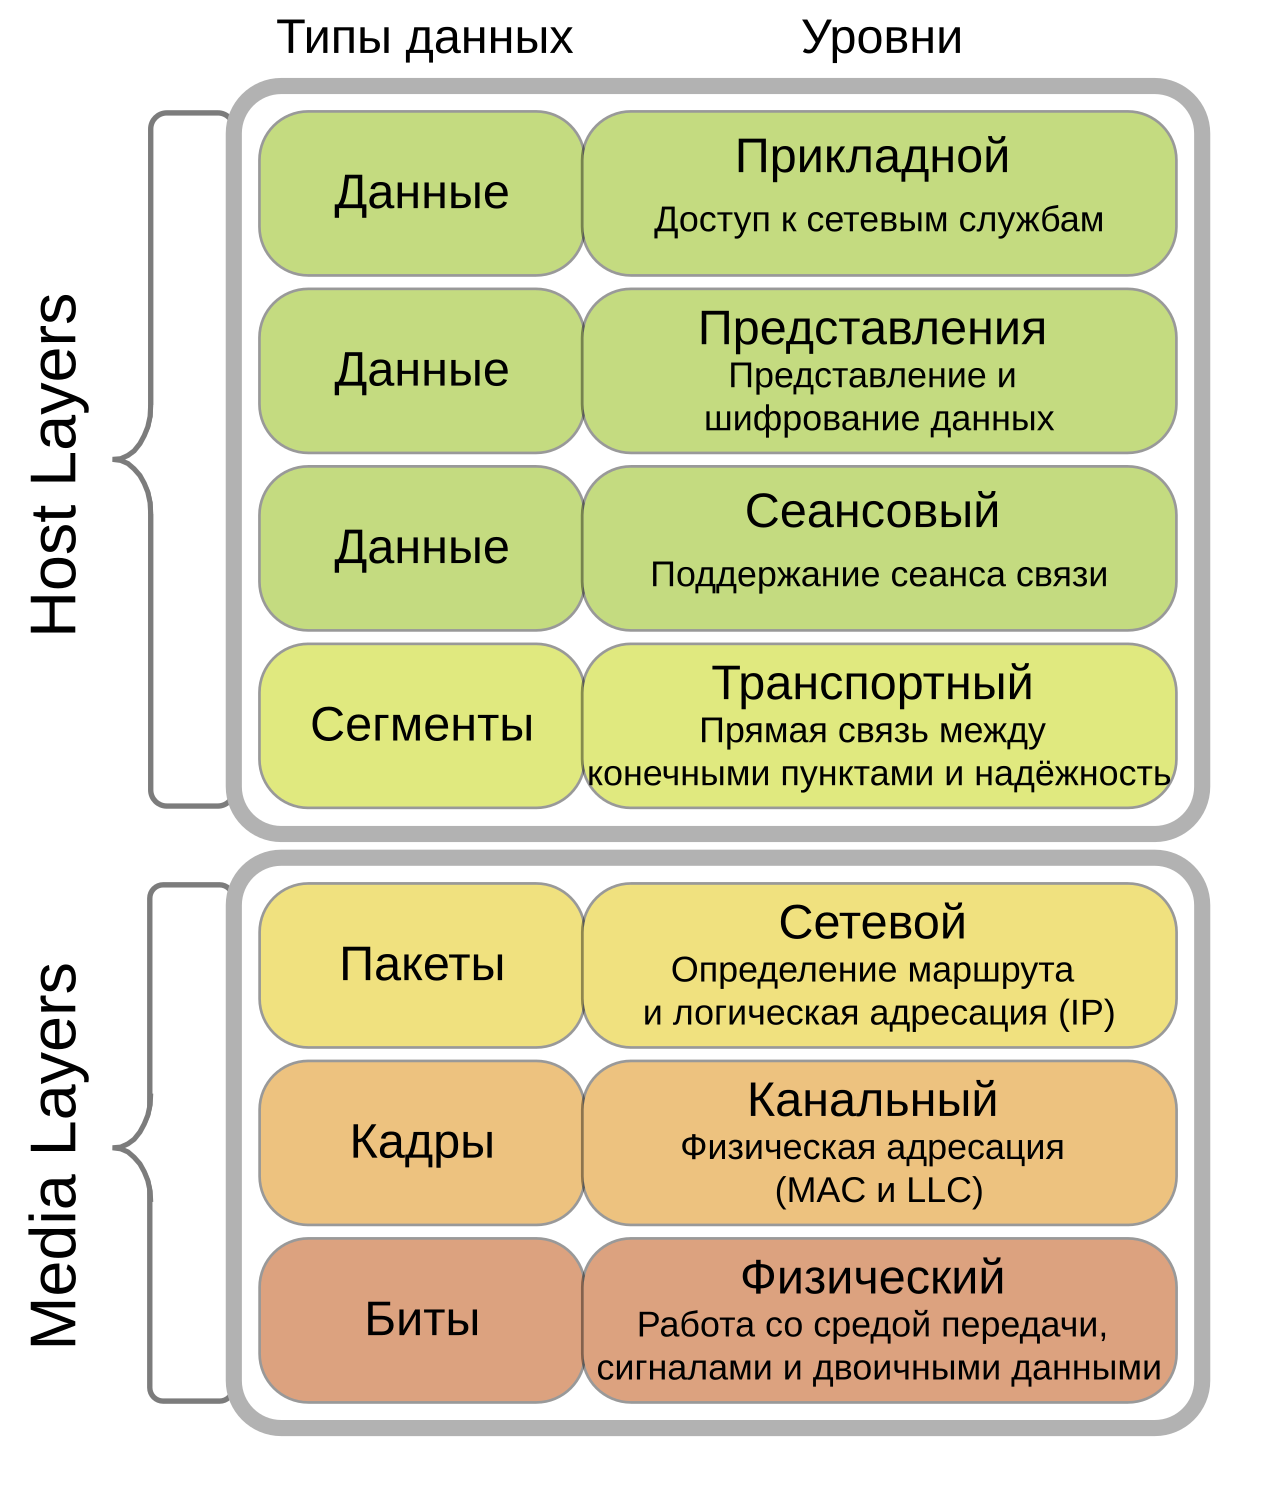

## Уровни

### Физический уровень

Уровень того, как данные передаются физически (сигнал); Примеры: USB, радиоканал, оптоволокно  
На физическом уровне происходит передача данных, их прием и преобразование в соответствии с методами кодирования сигналов. Тут происходит преобразование из сигнала в 0 и 1

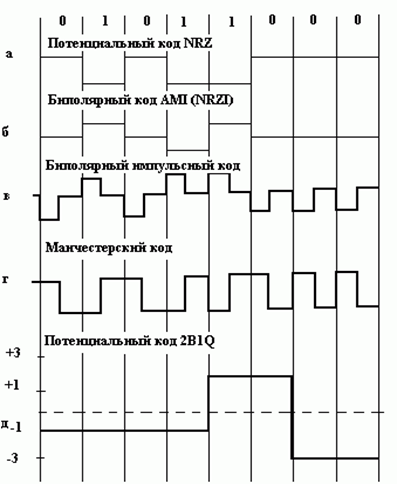

### Канальный уровень

Уровень того, как взаимодействуют сети на физическом уровне; Примеры: Ethernet

#### Кодировки (вообще это уровень представления)

Так как данные по сети не могут передаваться "как есть", они кодируются и декодируются согласно таблицам кодировки. Самые известные - ASCII, UTF-8

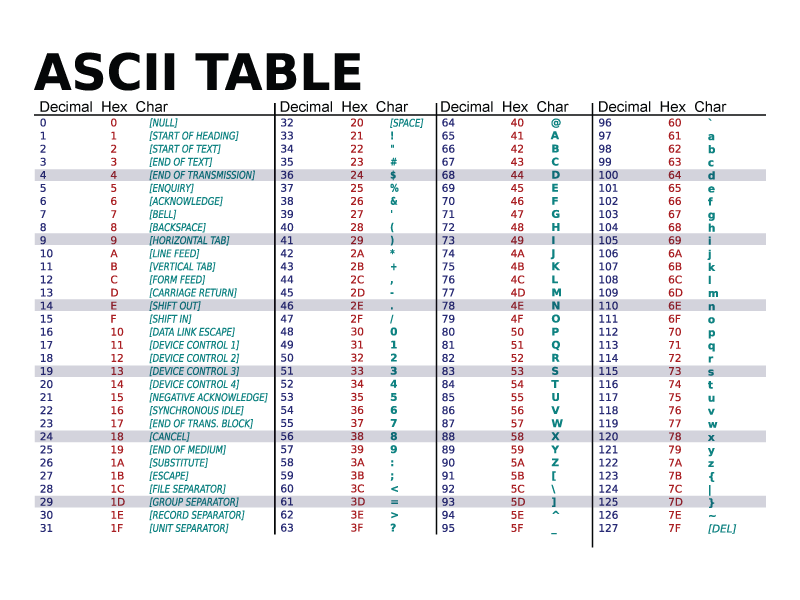

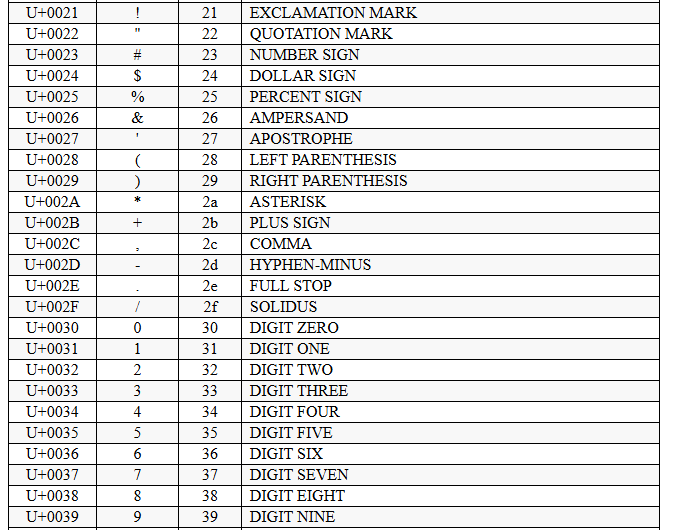 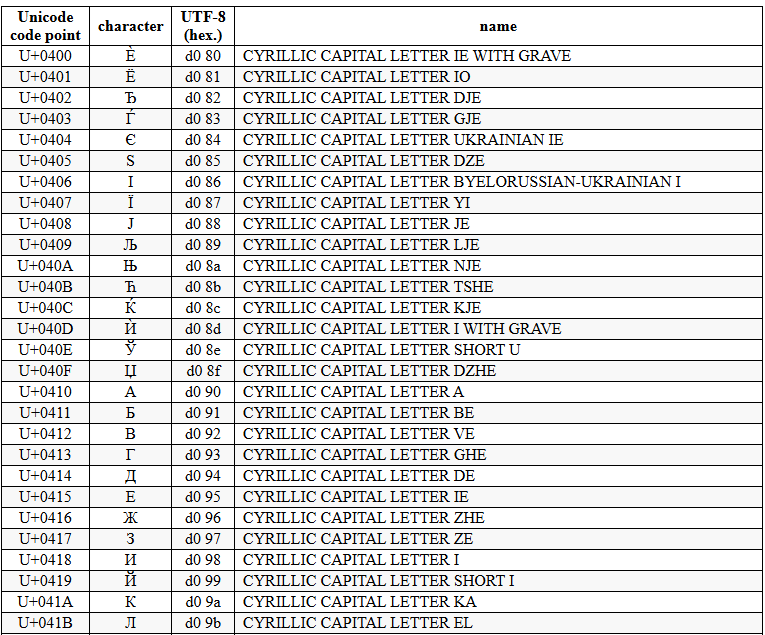

https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/ (только уже не 6, а 4 байта)

In [48]:
!echo -n world > simple_text.txt

In [49]:
codecs = ["cp1252", "cp437", "utf-8", "ascii"]

for codec in codecs:
    with open("simple_text.txt", "r", encoding=codec) as file:
      text = file.read()
    print(codec.rjust(0), "|", text)

cp1252 | world
cp437 | world
utf-8 | world
ascii | world


In [50]:
!echo -n мир > simple_text_ru.txt

In [52]:
codecs = ["cp1252", "cp437", "utf-8", "ascii"]

for codec in codecs:
    with open("simple_text_ru.txt", "r", encoding=codec, errors="ignore") as file:
      text = file.read()
    print(codec.rjust(0), "|", text)

cp1252 | Ð¼Ð¸Ñ€
cp437 | ╨╝╨╕╤Ç
utf-8 | мир
ascii | 


In [55]:
!echo -n world+мир+world > simple_text_mixed.txt

In [56]:
codecs = ["cp1252", "cp437", "utf-8", "ascii"]

for codec in codecs:
    with open("simple_text_mixed.txt", "r", encoding=codec, errors="ignore") as file:
      text = file.read()
    print(codec.rjust(0), "|", text)

cp1252 | world+Ð¼Ð¸Ñ€+world
cp437 | world+╨╝╨╕╤Ç+world
utf-8 | world+мир+world
ascii | world++world


#### Исправление ошибок

Одна из важных вещей на физическом уровне - исправления ошибок  
Т.к. при передаче данных могут возникнуть помехи или ошибки, было бы здорово уметь их исправлять.

00-0---0--------0------

Код Хэмминга - алгоритм для самокорректирующихся кодов, позволяющий исправлять ошибки (одну). Для него алгоритм такой:
- берем сообщение
- на позиции, что соответствуют степеням двойки, вставляем контрольные биты
- вычисляем их (значение берется с шагом в степени двойки)

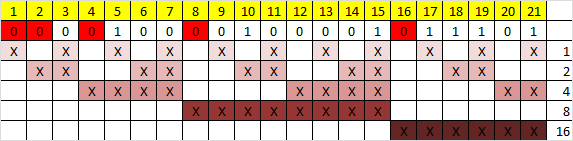

01000100 - сообщение (буква D)  
**00**0**0**100**0**0100 - вставляем биты  
**11**0**1**100**1**0100 - вычисляем

Проверка очевидна - получив сообщение, определяем позиции контрольных битов и заново их считаем  
Пусть произошла одна ошибка в последнем бите:
11011001010*1*

В таком случае считаем значения битов:
000010000101  
2^0 = 0 + 0 + 1 + 0 + 0 + 0 = 1  (было 1)  
2^1 = 0 + 1 + 0 + 0 + 1 + 0 = 1  (было 1)  
2^2 = 0 + 1 + 0 + 0 + 1 = 0  (было 1)  
2^3 = 0 + 0 + 1 + 0 + 1 = 0  (было 1)  
вывод - ошибка в 2^2 + 2^3 = 12 символе ч.т.д.

### Сетевой уровень

Уровень того, как определяется маршрут для данных; Примеры: IPv4, IPv6

#### IPv4

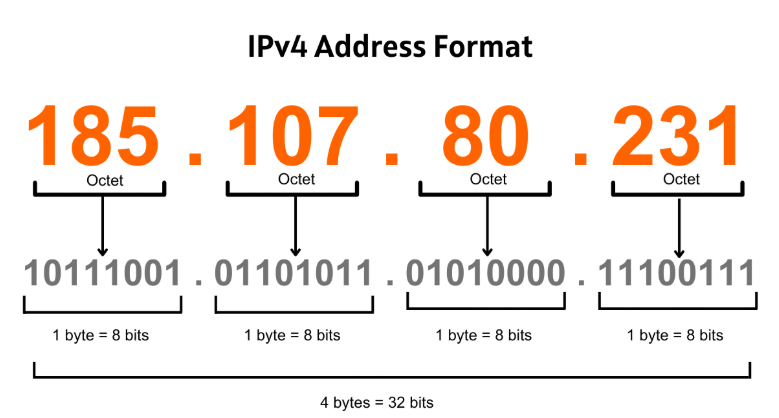

Есть несколько групп ip'шников, каждый используется для различных нужд:  
- 0.XXX.XXX.XXX - 127.XXX.XXX.XXX - локальные сети  
- 128.XXX.XXX.XXX - 191.255.XXX.XXX - большие сети
- 192.0.0.XXX - 223.255.255.XXX - мелкие сети  
- 224.XXX.XXX.XXX - 239.XXX.XXX.XXX - многоадресная рассылка (стриминг)  
- 240.XXX.XXX.XXX - 255.XXX.XXX.XXX - зарезервировано

Позднее оказалось, что такое разбиение не очень эффективно, так что было дополнено бесклассовой адресацией (CIDR)

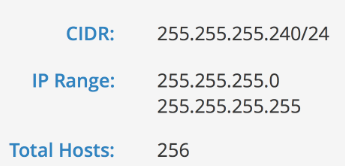

#### IPv6

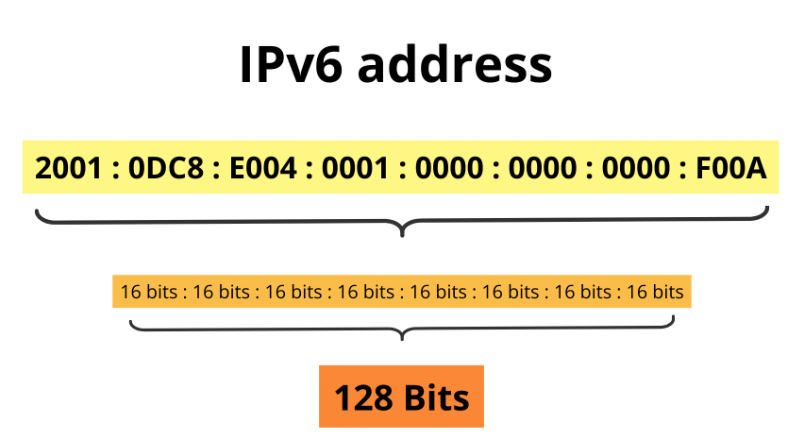

#### NAT

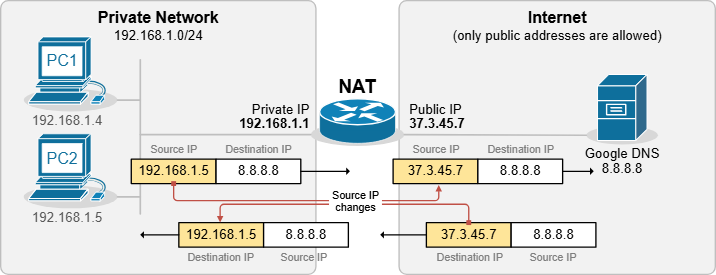

### Транспортный уровень

Уровень того, как обеспечить связь между отправителем и получателем и ее надежность; Примеры: TCP, UDP

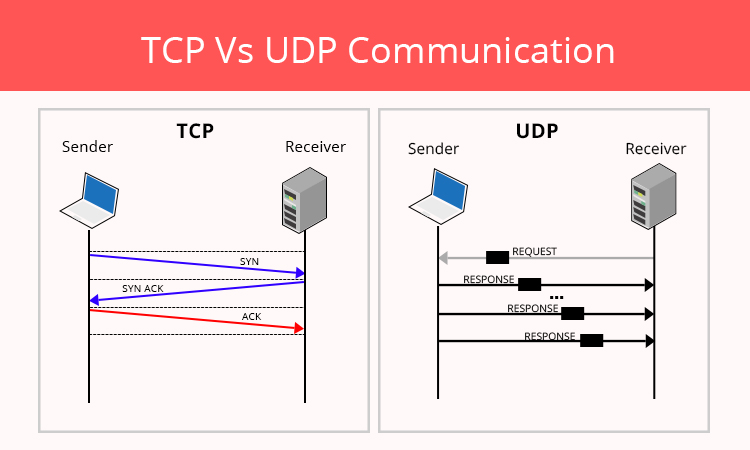

### Сеансовый уровень

Уровень того, как обеспечить связь на длительный сеанс; Примеры: RPC, gRPC

### Уровень представления

Уровень того, как представить переданные данные для работы с ними; Примеры: gzip, ASCII

#### Энтропия

Энтропия - мера неопределенности системы; энтропия источника равна среднему кол-ву информации, приходящемуся на один символ. Энтропия максимальна тогда, когда все события равновероятны

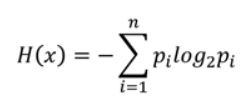

#### Сжатие данных

Из-за того, что в реальной жизни события (появление символов) НЕ равновероятны, то сжатие позволяет нам эффективно сокращать затраты на передачу данных. Сжатие бывает с потерями и без потерь

##### Сжатие без потерь

Сжатие без потерь - файловые архиваторы. Работают они примерно так (Алгоритм Хаффмана):
- Делаем таблицу последовательстей:  
00 → 0  
01 → 10  
10 → 110  
11 → 111  
- Кодируем:
00 01 00 00 11 10 00 00 -> 0 10 0 0 111 110 0 0

Как формируем таблицу последовательностей:
- составляем список символов, строим дерево
- выбираем два узла с наименьшим весом
- формируем новый с весом, равным сумме их весов, добавляем их как детей
- добавляем к списку новый узел вместо них
- повторяем
- в итоге идем по дереву и получаем коды

Пример (abracadabra):
- A = {a,b,r,c,d}
- W = {5,2,2,1,1}
- {a: 5, b:2, r:2, c:1, d:1}
- {a: 5, b:2, r:2, cd:2}
- {a: 5, b:2, rcd:4}
- {a: 5, brcd:6}
- {abrcd: 11}

a - 0
b - 11
r - 101
d - 1001
c - 1000

abracadabra = 01110101000010010111010 = abracadabra

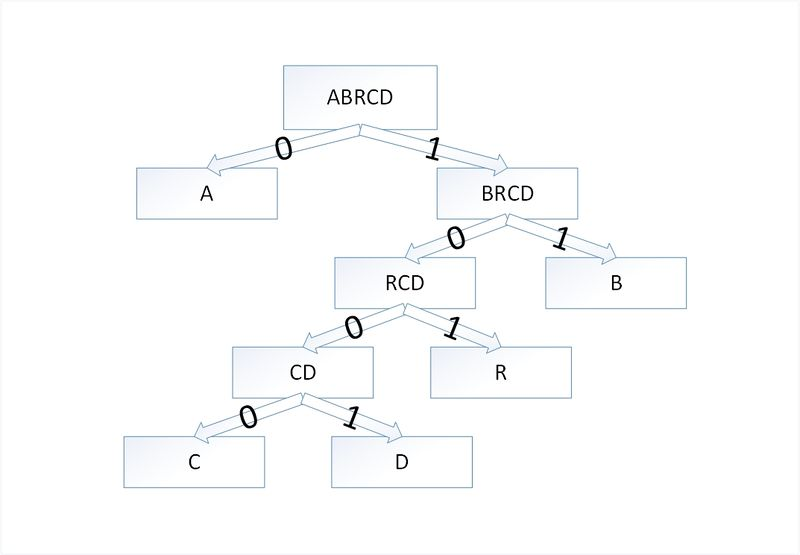

aaabdaaabac  
X=aa  
XabdXabac  
Y=ab  
XYdXYac  
Z=XY  
ZdZac  

X=aa;Y=ab;Z=XY  
ZdZac

##### Сжатие с потерями

Иногда потери допустимы - к примеру, для музыки, изображений и тд.

In [57]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3d/LARGE_elevation.jpg

--2025-12-04 16:33:19--  https://upload.wikimedia.org/wikipedia/commons/3/3d/LARGE_elevation.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14488498 (14M) [image/jpeg]
Saving to: ‘LARGE_elevation.jpg’

LARGE_elevation.jpg 100%[===================>]  13.82M  23.5MB/s    in 0.6s    

2025-12-04 16:33:20 (23.5 MB/s) - ‘LARGE_elevation.jpg’ saved [14488498/14488498]



In [58]:
from PIL import Image
import os

def getSize(filename):
  st = os.stat(filename)
  return st.st_size

In [61]:
getSize("LARGE_elevation.jpg")

14488498

In [62]:
with Image.open("LARGE_elevation.jpg", 'r') as source:
  source.save('target.jpg', quality=50, optimize=True, progressive=True)

In [67]:
getSize("target.jpg"), getSize("target2.jpg")

(9285894, 3687762)

In [64]:
getSize("LARGE_elevation.jpg") > getSize("target.jpg")

True

In [65]:
with Image.open("LARGE_elevation.jpg", 'r') as source:
  w, h = source.size
  source = source.resize((int(w/2), int(h/2)))
  source.save('target2.jpg')

In [66]:
getSize("LARGE_elevation.jpg") > getSize("target2.jpg")

True

### Прикладной уровень

Уровень того, как работают приложения; Примеры: HTTP, SMTP

#### JSON -> HTTP

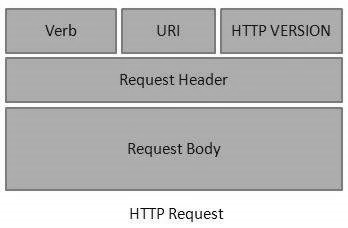

In [68]:
import requests
api_url = "https://jsonplaceholder.typicode.com/todos/1"
response = requests.get(api_url)
response.json()

{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False}

In [69]:
response.status_code

200

In [70]:
response.headers["Content-Type"]

'application/json; charset=utf-8'

In [71]:
api_url = "https://jsonplaceholder.typicode.com/todos"
todo = {"userId": 1, "title": "Buy milk", "completed": False}
response = requests.post(api_url, json=todo)
response.json()

{'userId': 1, 'title': 'Buy milk', 'completed': False, 'id': 201}

#### XML -> SOAP -> HTTP

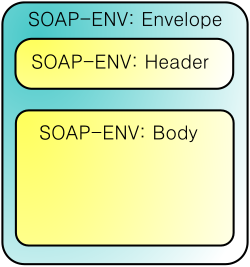

In [72]:
url = "http://webservices.oorsprong.org/websamples.countryinfo/CountryInfoService.wso"

payload = """<?xml version=\"1.0\" encoding=\"utf-8\"?>
            <soap:Envelope xmlns:soap=\"https://schemas.xmlsoap.org/soap/envelope/%5C">
                <soap:Body>
                    <CountryIntPhoneCode xmlns=\"http://www.oorsprong.org/websamples.countryinfo/%5C">
                        <sCountryISOCode>IN</sCountryISOCode>
                    </CountryIntPhoneCode>
                </soap:Body>
            </soap:Envelope>"""

headers = {
    'Content-Type': 'text/xml; charset=utf-8'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1"/>
<title>500 - Internal server error.</title>
<style type="text/css">
<!--
body{margin:0;font-size:.7em;font-family:Verdana, Arial, Helvetica, sans-serif;background:#EEEEEE;}
fieldset{padding:0 15px 10px 15px;} 
h1{font-size:2.4em;margin:0;color:#FFF;}
h2{font-size:1.7em;margin:0;color:#CC0000;} 
h3{font-size:1.2em;margin:10px 0 0 0;color:#000000;} 
#header{width:96%;margin:0 0 0 0;padding:6px 2% 6px 2%;font-family:"trebuchet MS", Verdana, sans-serif;color:#FFF;
background-color:#555555;}
#content{margin:0 0 0 2%;position:relative;}
.content-container{background:#FFF;width:96%;margin-top:8px;padding:10px;position:relative;}
-->
</style>
</head>
<body>
<div id="header"><h1>Server Error</h1></div>
<div id="content">
 <div class="content-container"><fieldset>


#### GraphQL

In [73]:
endpoint = "https://api.disneyapi.dev/graphql"
graph_query_char = '''{
  characters(page: 1, pageSize: 5) {     # search for character page 1
    items {                 # return items with the following fields
      url
      name
      imageUrl
      alignment
    }
    paginationInfo {       # concatenate with pagination info
      hasNextPage
      hasPreviousPage
      pageItemCount
      totalPages
    }
  }
}'''

In [74]:
response = requests.post(endpoint, json={'query': graph_query_char})
response.json()

{'data': {'characters': {'items': [{'url': 'https://api.disneyapi.dev/characters/112',
     'name': 'Achilles',
     'imageUrl': 'https://static.wikia.nocookie.net/disney/images/6/67/HATS_Achilles.png',
     'alignment': None},
    {'url': 'https://api.disneyapi.dev/characters/18',
     'name': 'Abigail the Cow',
     'imageUrl': 'https://static.wikia.nocookie.net/disney/images/0/05/Fox-disneyscreencaps_com-901.jpg',
     'alignment': None},
    {'url': 'https://api.disneyapi.dev/characters/16',
     'name': 'Abdullah',
     'imageUrl': 'https://static.wikia.nocookie.net/disney/images/3/3a/Abdullah.jpg',
     'alignment': None},
    {'url': 'https://api.disneyapi.dev/characters/45',
     'name': 'Admiral Boom and Mr. Binnacle',
     'imageUrl': 'https://static.wikia.nocookie.net/disney/images/b/be/Marypoppins-disneyscreencaps_com-1086.jpg',
     'alignment': None},
    {'url': 'https://api.disneyapi.dev/characters/7',
     'name': '.GIFfany',
     'imageUrl': 'https://static.wikia.noco

# Шифрование

## Симметричное

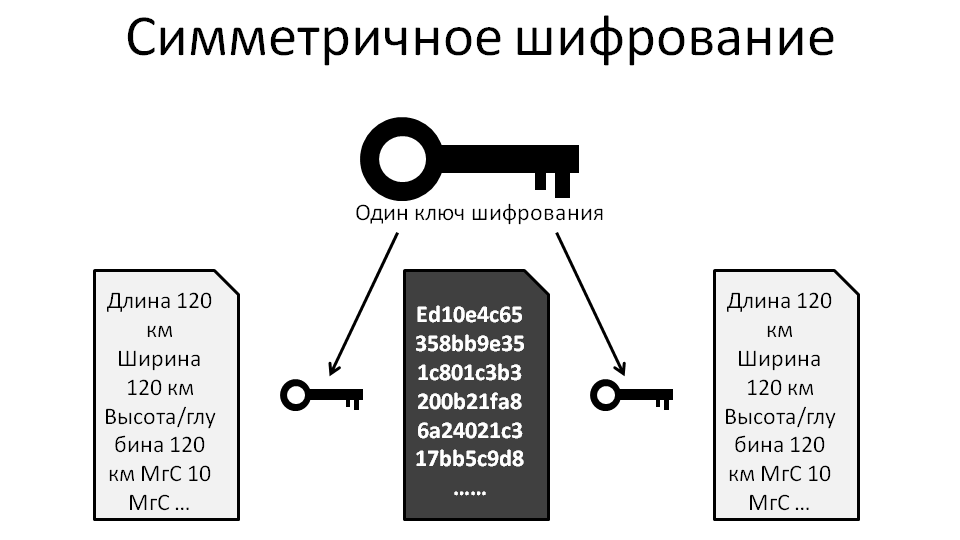

In [75]:
!pip install pycryptodome

In [76]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes


In [77]:
# Generate a random AES key
key = get_random_bytes(16)  # 16 bytes for AES-128

# Create a new AES cipher in EAX mode for encryption
cipher = AES.new(key, AES.MODE_EAX)
data = b'Secret Message'

# Encrypt the data and get the nonce, ciphertext and tag
nonce = cipher.nonce
ciphertext, tag = cipher.encrypt_and_digest(data)

In [78]:
ciphertext

b'\x15\xc5\x06\xe7W\xf5){\xae\xbe\xd3\xf3yU'

In [79]:
# Create a new AES cipher in EAX mode for decryption
cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
plaintext = cipher.decrypt(ciphertext)
""
# Verify the authenticity of the message
try:
    cipher.verify(tag)
    print("The message is authentic:", plaintext)
except ValueError:
    print("Key incorrect or message corrupted")

The message is authentic: b'Secret Message'


In [80]:
key2 = get_random_bytes(16)
# Create a new AES cipher in EAX mode for decryption
cipher = AES.new(key2, AES.MODE_EAX, nonce=nonce)
plaintext = cipher.decrypt(ciphertext)
""
# Verify the authenticity of the message
try:
    cipher.verify(tag)
    print("The message is authentic:", plaintext)
except ValueError:
    print("Key incorrect or message corrupted")

Key incorrect or message corrupted


## Ассиметричное

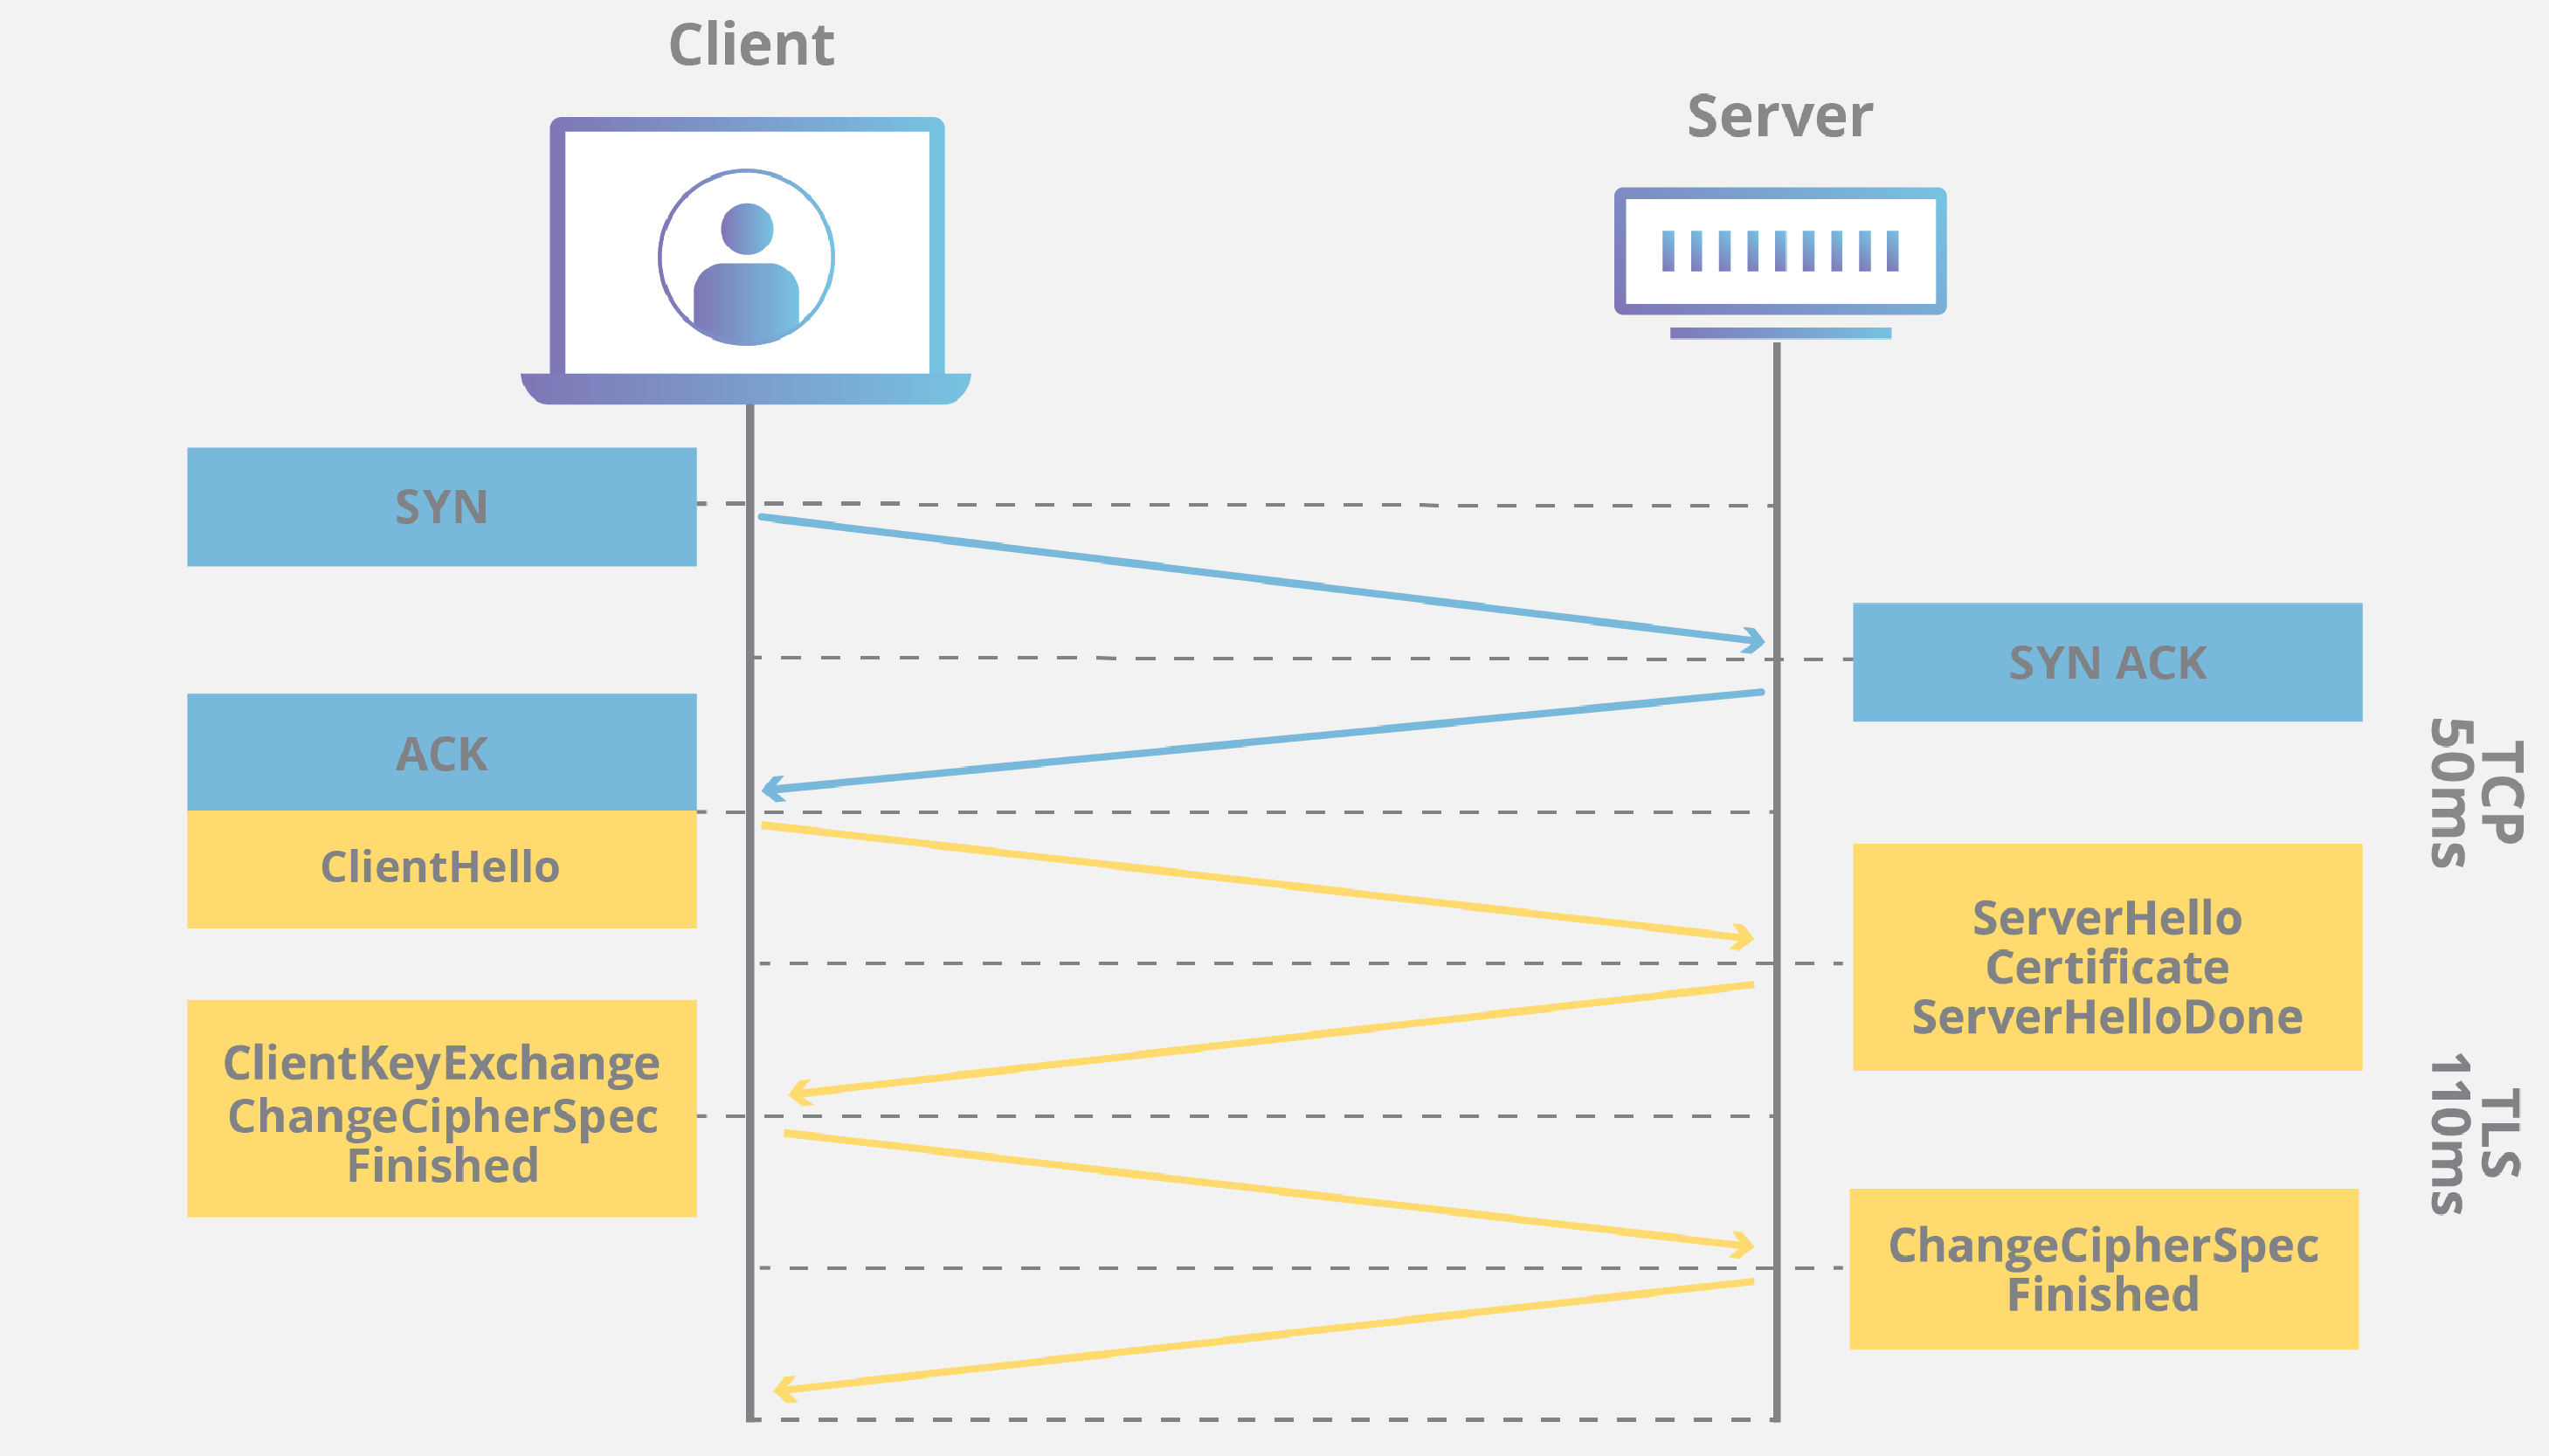

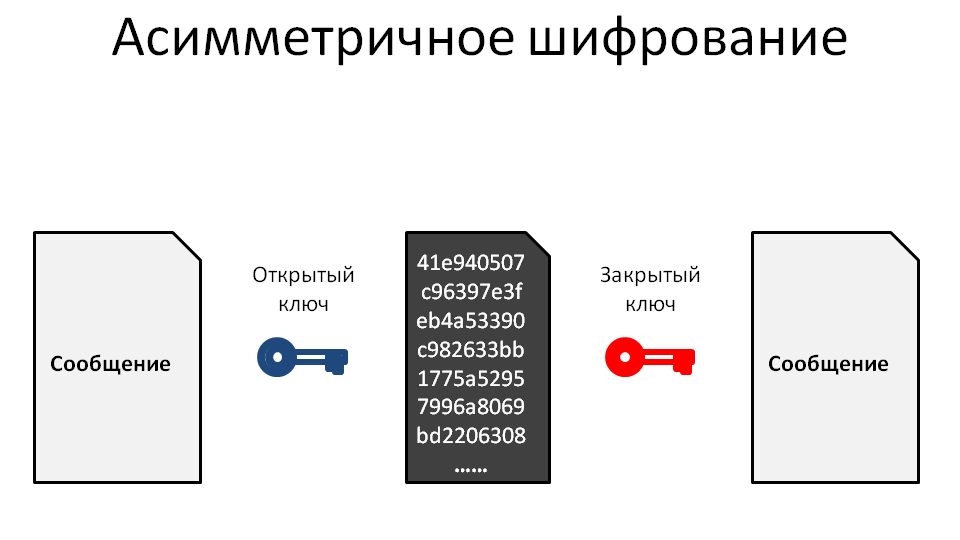

In [81]:
from Crypto.PublicKey import RSA

key = RSA.generate(2048)
private_key = key.export_key()
with open("private.pem", "wb") as f:
    f.write(private_key)

public_key = key.publickey().export_key()
with open("receiver.pem", "wb") as f:
    f.write(public_key)

In [82]:
from Crypto.PublicKey import RSA
from Crypto.Random import get_random_bytes
from Crypto.Cipher import AES, PKCS1_OAEP

In [83]:
data = "I met aliens in UFO. Here is the map.".encode("utf-8")

recipient_key = RSA.import_key(open("receiver.pem").read())
session_key = get_random_bytes(16)

# Encrypt the session key with the public RSA key

cipher_rsa = PKCS1_OAEP.new(recipient_key)
enc_session_key = cipher_rsa.encrypt(session_key)

# Encrypt the data with the AES session key

cipher_aes = AES.new(session_key, AES.MODE_EAX)
ciphertext, tag = cipher_aes.encrypt_and_digest(data)

with open("encrypted_data.bin", "wb") as f:
    f.write(enc_session_key)
    f.write(cipher_aes.nonce)
    f.write(tag)
    f.write(ciphertext)

In [84]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import AES, PKCS1_OAEP

In [85]:
private_key = RSA.import_key(open("private.pem").read())

with open("encrypted_data.bin", "rb") as f:
    enc_session_key = f.read(private_key.size_in_bytes())
    nonce = f.read(16)
    tag = f.read(16)
    ciphertext = f.read()

# Decrypt the session key with the private RSA key
cipher_rsa = PKCS1_OAEP.new(private_key)
session_key = cipher_rsa.decrypt(enc_session_key)

# Decrypt the data with the AES session key
cipher_aes = AES.new(session_key, AES.MODE_EAX, nonce)
data = cipher_aes.decrypt_and_verify(ciphertext, tag)
print(data.decode("utf-8"))

I met aliens in UFO. Here is the map.


# Капча

In [ ]:
!pip install captcha

In [87]:
from captcha.image import ImageCaptcha

In [ ]:
!wget https://www.dafontfree.co/wp-content/uploads/download-manager-files/LDF-ComicSans.zip

In [ ]:
!unzip LDF-ComicSans.zip

In [88]:
image = ImageCaptcha(fonts=['LDFComicSans.ttf'])
data = image.generate('hello')
image.write('hello', 'out.png', bg_color=(255, 255, 0), fg_color=(255, 0, 0))